# Introduction
In this project we will attempt to discover:
- Has Scotland passed the peak?
- Has deprivation had an impact?
- Which council areas have been most affected and why?


## Deaths

### Preparing the data for deaths per week, and deaths by deprivation
Firstly we will use datasets from opendata.nhs.scot 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as dates

#Load data
deaths_age_sex_csv = 'https://www.opendata.nhs.scot/dataset/5a9ecd07-fcd0-433c-94be-771eb4e0a691/resource/733aad2d-5420-4966-bc34-386a3475623f/download/deaths_hb_agesex_21072020.csv'
deaths_hb_simd_csv = 'https://www.opendata.nhs.scot/dataset/5a9ecd07-fcd0-433c-94be-771eb4e0a691/resource/98648584-4a34-4374-832c-d3f50b6edd80/download/deaths_hb_simd_21072020.csv'

#Output files
monthly_deaths_png = '.\\Graphs\\monthly-deaths.png'
deaths_by_simd_png = '.\\Graphs\\deaths-by-simd.png'

#Load data into dataframes
df = pd.read_csv(deaths_age_sex_csv)
df = df[(df['AgeGroupQF'] == 'd') & (df['SexQF'] == 'd')]
df_simd = pd.read_csv(deaths_hb_simd_csv)

#Investigate the data
print(df.head())
print(df_simd.head())


    WeekEnding         HB HBQF  AgeGroup AgeGroupQF  Sex SexQF  Deaths  \
2     20200105  S08000015  NaN  All ages          d  All     d     105   
7     20200105  S08000016  NaN  All ages          d  All     d      19   
12    20200105  S08000017  NaN  All ages          d  All     d      37   
17    20200105  S08000019  NaN  All ages          d  All     d      76   
22    20200105  S08000020  NaN  All ages          d  All     d     112   

    Average20152019  PercentVariation PercentVariationQF  
2              98.0               7.1                NaN  
7              29.0             -34.5                NaN  
12             41.8             -11.5                NaN  
17             72.4               5.0                NaN  
22            127.2             -11.9                NaN  
   WeekEnding    Country  SIMDQuintile  Deaths  Average20152019  \
0    20200105  S92000003             1     283            306.4   
1    20200105  S92000003             2     258            290.6   


Next, let's add extra columns with extra date information to the main dataframe.

In [2]:
#Add Columns for more date data
formatted_dates_list = []
months_list = []
for ymd in df['WeekEnding']:
    formatted_date = datetime.strptime(str(ymd), '%Y%m%d').strftime('%m/%d/%Y')
    month = datetime.strptime(str(ymd), '%Y%m%d').strftime('%B')
    formatted_dates_list.append(formatted_date)
    months_list.append(month)
df['Formatted Date'] = formatted_dates_list
df['Month'] = months_list

print(df.head())

    WeekEnding         HB HBQF  AgeGroup AgeGroupQF  Sex SexQF  Deaths  \
2     20200105  S08000015  NaN  All ages          d  All     d     105   
7     20200105  S08000016  NaN  All ages          d  All     d      19   
12    20200105  S08000017  NaN  All ages          d  All     d      37   
17    20200105  S08000019  NaN  All ages          d  All     d      76   
22    20200105  S08000020  NaN  All ages          d  All     d     112   

    Average20152019  PercentVariation PercentVariationQF Formatted Date  \
2              98.0               7.1                NaN     01/05/2020   
7              29.0             -34.5                NaN     01/05/2020   
12             41.8             -11.5                NaN     01/05/2020   
17             72.4               5.0                NaN     01/05/2020   
22            127.2             -11.9                NaN     01/05/2020   

      Month  
2   January  
7   January  
12  January  
17  January  
22  January  


For the main data frame, we want to group the data so that we can see the deaths per week in 2020, and the average number of deaths per week in the years prior.

In [3]:
#Show the number of deaths per week
df = df.groupby(['WeekEnding','Month'])[['Deaths','Average20152019']].sum().reset_index()
df['WeekEnding'] = pd.to_datetime(df['WeekEnding'], format='%Y%m%d')

print(df.head())

  WeekEnding     Month  Deaths  Average20152019
0 2020-01-05   January    2318           2548.4
1 2020-01-12   January    3126           3114.0
2 2020-01-19   January    2638           2760.8
3 2020-01-26   January    2447           2629.6
4 2020-02-02  February    2373           2556.2


For the SIMD dataframe, we want to create a pivot chart so that we can see the number of deaths per SIMD index, grouped by week.

In [4]:
df_simd['WeekEnding'] = pd.to_datetime(df_simd['WeekEnding'], format='%Y%m%d')
df_simd = df_simd.pivot_table(index='WeekEnding',columns='SIMDQuintile')['Deaths']

print(df_simd.head())

SIMDQuintile    1    2    3    4    5
WeekEnding                           
2020-01-05    283  258  253  212  151
2020-01-12    384  360  330  281  204
2020-01-19    313  301  273  251  178
2020-01-26    325  262  247  215  172
2020-02-02    276  281  249  195  184


### Displaying the Data

Let's take a look at the number of deaths in 2020, v the number of deaths in the years prior to 2020.

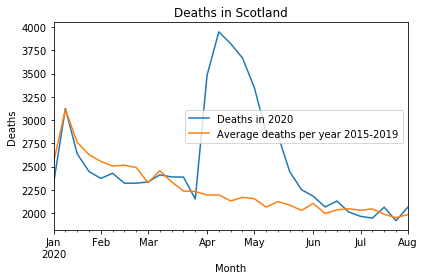

In [5]:
#Plot graph showing deaths in 2020 against deaths over the last 4 years
ax = df.plot(x='WeekEnding',y=['Deaths','Average20152019'])
ax.set(xlabel='Month', ylabel='Deaths')
plt.title('Deaths in Scotland')
ax.legend(["Deaths in 2020", "Average deaths per year 2015-2019"]);
plt.tight_layout()
ax.figure.savefig(monthly_deaths_png)


Next we will take a look at the number of deaths per week, by SIMD

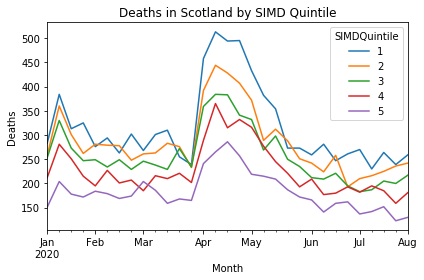

In [6]:
#Plot a graph showing the number of deaths in 2020 by SIMD
ax = df_simd.plot()
ax.set(xlabel='Month', ylabel='Deaths')
plt.title('Deaths in Scotland by SIMD Quintile')
plt.tight_layout()
ax.figure.savefig(deaths_by_simd_png)


## Number of Cases


### Preparing the Data
This time we will use datasets from both opendata.nhs.scot and csv files downloaded from statistics.gov.scot

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as dates
import numpy as np
import seaborn as sns

#Load data
cases_ca = 'https://www.opendata.nhs.scot/dataset/b318bddf-a4dc-4262-971f-0ba329e09b87/resource/427f9a25-db22-4014-a3bc-893b68243055/download/trend_ca_20200809.csv'
pop_density_ca = '.\\Data\\mid-year-pop-est-19-time-series-2_1981-2019.csv'
land_area_ca = '.\\Data\\land_area_ca_2014.csv'

#Output files
cases_by_area_png = '.\\Graphs\\cases-by-area.png'
cases_by_area_labelled_png = '.\\Graphs\\cases-by-area-labelled.png'

#Function to load data
def load_data(csv_path, columns, skiprows, nrows):
    '''
    Parameters:
    csv_path: the csv containing the data
    columns: the columns to be included
    skiprows: line numbers to skip (0-indexed) or number of lines to skip (int) at the start of the file.
    nrows: number of rows of file to read

    Returns:
    df: a dataframe containing the loaded data
    '''

    df = pd.read_csv(csv_path, skiprows=skiprows, nrows=nrows, thousands=',')
    df = df[columns]
    df.dropna(how="all", inplace=True)
    return df

#Load data into dataframes
df_cases = load_data(cases_ca, ['CA','CumulativePositive','CumulativeDeaths'], None, None)
df_cases_pivot = df_cases.groupby(['CA']).max()

df_popdensity = load_data(pop_density_ca, ['Code','Persons','2019'], skiprows = 2, nrows=35)
df_popdensity.rename(columns={"Persons": "CouncilArea", "Code": "CA", "2019": "PopDensity"}, inplace=True)

df_landarea = load_data(land_area_ca, ['FeatureCode','Value'], None, None)
df_landarea.rename(columns={"FeatureCode": "CA", "Value": "LandArea"}, inplace=True)

print(df_cases.head())
print(df_popdensity.head())
print(df_landarea.head())

          CA  CumulativePositive  CumulativeDeaths
0  S12000005                   0                 0
1  S12000006                   0                 0
2  S12000008                   0                 0
3  S12000010                   0                 0
4  S12000011                   0                 0
          CA      CouncilArea  PopDensity
1  S92000003         Scotland   5463300.0
2  S12000033    Aberdeen City    228670.0
3  S12000034    Aberdeenshire    261210.0
4  S12000041            Angus    116200.0
5  S12000035  Argyll and Bute     85870.0
          CA    LandArea
0  S13002516   23827.131
1  S13002517  177176.224
2  S13002518   79837.075
3  S13002519  109224.886
4  S13002520  156589.083


Next, let's combine the three dataframes

In [8]:
#Combine into one dataframe
df_combined_pd = pd.merge(df_popdensity, df_cases_pivot, on='CA')
df_combined_pd = pd.merge(df_combined_pd, df_landarea, on='CA')

print(df_combined_pd.head())

          CA        CouncilArea  PopDensity  CumulativePositive  \
0  S12000033      Aberdeen City    228670.0                1073   
1  S12000034      Aberdeenshire    261210.0                 588   
2  S12000041              Angus    116200.0                 474   
3  S12000035    Argyll and Bute     85870.0                 169   
4  S12000036  City of Edinburgh    524930.0                1842   

   CumulativeDeaths    LandArea  
0                78   18570.629  
1                58  631260.885  
2                46  218178.547  
3                35  690946.621  
4               263   26333.391  


### Displaying the Data

Let's take a look at the number of cases by population density. On this graph we can see:
- The number of cases by council area on the x-axis
- The population density by council area on the y-axis
- The land area of the council area represented by the size of the bubble

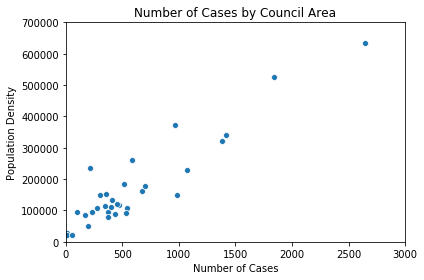

In [12]:
ax1 = sns.scatterplot(x='CumulativePositive', y='PopDensity', data=df_combined_pd, legend=False)#, hue='CouncilArea', alpha=0.6
ax1.set(ylim=(0, 700000),xlim=(0, 3000),xlabel='Number of Cases', ylabel='Population Density')
plt.title('Number of Cases by Council Area')
plt.tight_layout()

But what about the size of the area? Let's re-plot this graph as a bubble graph, with the land area of the council area represented by the size of the bubble.

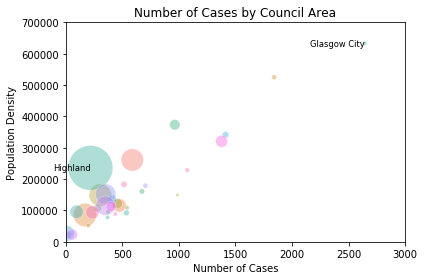

In [13]:
#Plot a bubble diagram, with labels to show Glasgow and Highlands
ax2 = sns.scatterplot(x='CumulativePositive', y='PopDensity', data=df_combined_pd, size='LandArea', hue='CouncilArea', sizes=(10, 2000), alpha=0.4, legend=False)
ax2.set(ylim=(0, 700000),xlim=(0, 3000),xlabel='Number of Cases', ylabel='Population Density')
plt.title('Number of Cases by Council Area')
plt.tight_layout()
for line in df_combined_pd.index:
    if (df_combined_pd.CouncilArea[line] == 'Glasgow City' or df_combined_pd.CouncilArea[line] == 'Highland'):
        ax2.text(df_combined_pd.CumulativePositive[line], df_combined_pd.PopDensity[line], df_combined_pd.CouncilArea[line], ha='right', va='center', size='small', color='black')

Let's take a further look at Land Area by exploring the difference between the records for Glasgow City and The Highlands

In [11]:
#Drilling down into the records for Glasgow v Highlands
df_GLA_HIG = df_combined_pd[['CouncilArea','CumulativePositive', 'PopDensity', 'LandArea']]
df_GLA_HIG = df_GLA_HIG.loc[(df_GLA_HIG['CouncilArea'] == 'Glasgow City') | (df_GLA_HIG['CouncilArea'] == 'Highland')]
print(df_GLA_HIG)

     CouncilArea  CumulativePositive  PopDensity     LandArea
14  Glasgow City                2642    633120.0    17467.557
15      Highland                 218    235830.0  2568388.607


# Conclusion

From looking at the data we have concluded that:
- The peak number of deaths in Scotland happened in April.
- The more deprived an area is, the more people are likely to die of coronavirus.
- There are considerably more cases in densely populated areas than in sparsely populated areas.
- There is no correlation between the land area of a concil area, and the number of cases.